In [1]:
%matplotlib inline
from bayes import *
from timeit import default_timer as timer

In [2]:
class Dice(Pmf):
    """Pmf w/ likelihood function for Dice"""
    
    def like(self, data, hypo):
        """likelihood of die (hypo) producing roll (data)"""
        if hypo < data:
            return 0
        else:
            return 1/hypo


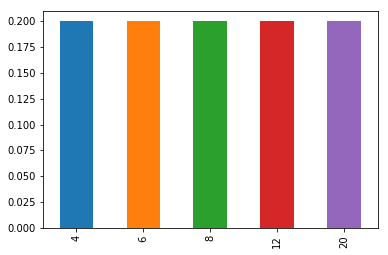

In [3]:
# get pmf distribution for dice
dice = Dice(1.0, index=[4,6,8,12,20])
dice.normalize()
dice.plot(kind='bar')

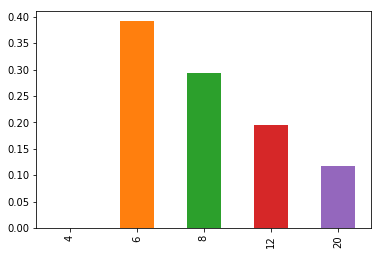

In [4]:
# update pmf distribution for dice with
# one confirmed roll of six
dice.update(6)
dice.plot(kind='bar')

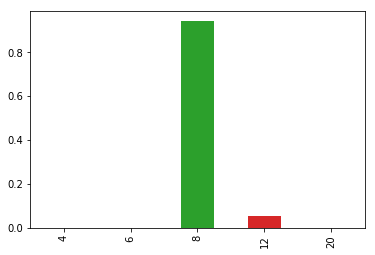

In [5]:
# further update pmf for dice with
# other values
dice.update_set(6,8,7,7,5,4)
dice.plot(kind='bar')

In [6]:
class Loco(Dice):
    """Class representing n-long trains
    
    This has the same likelihood funciton
    as a Dice distribution.
    """
    pass


In [7]:
# different possible max train lengths
locos_500 = Loco(get_init_pmf(range(1,501)))
locos_1000 = Loco(get_init_pmf(range(1,1001)))
locos_2000 = Loco(get_init_pmf(range(1,2001)))

locos500 pmf-mean: 207.07922798340903
locos2000 pmf-mean: 333.41989326371095
locos2000 pmf-mean: 552.179017164631


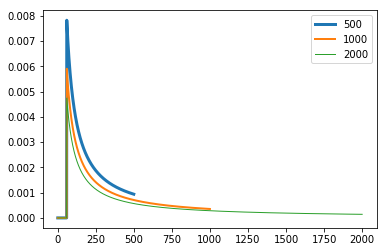

In [8]:
# update the three train distributions w/ one
# confirmed value
locos_500.update(60)
locos_1000.update(60)
locos_2000.update(60)
print('locos500 pmf-mean:',locos_500.pmf_mean())
print('locos2000 pmf-mean:',locos_1000.pmf_mean())
print('locos2000 pmf-mean:',locos_2000.pmf_mean())
locos_500.plot(legend=True,label='500', linewidth=3.0)
locos_1000.plot(legend=True,label='1000', linewidth=2.0)
locos_2000.plot(legend=True,label='2000', linewidth=1.0)

locos500 pmf-mean: 151.84958795903836
locos2000 pmf-mean: 164.3055864227335
locos2000 pmf-mean: 171.33818109150926


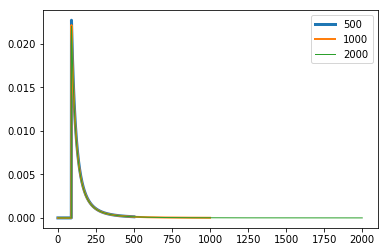

In [9]:
# further update train pmfs w/ more data
locos_500.update_set(30,90)
locos_1000.update_set(30,90)
locos_2000.update_set(30,90)
print('locos500 pmf-mean:',locos_500.pmf_mean())
print('locos2000 pmf-mean:',locos_1000.pmf_mean())
print('locos2000 pmf-mean:',locos_2000.pmf_mean())
locos_500.plot(legend=True,label='500', linewidth=3.0)
locos_1000.plot(legend=True,label='1000', linewidth=2.0)
locos_2000.plot(legend=True,label='2000', linewidth=1.0)

locos500 pmf-mean: 143.81231982097916
locos2000 pmf-mean: 178.54735317971574
locos2000 pmf-mean: 215.56892550615518


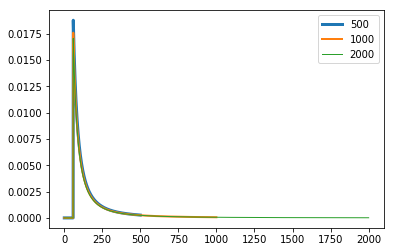

In [10]:
# create train pmfs initialized w/ power law prior
locos_pow_500 = Loco(get_init_pow_law_prior_pmf(range(1,501)))
locos_pow_1000 = Loco(get_init_pow_law_prior_pmf(range(1,1001)))
locos_pow_2000 = Loco(get_init_pow_law_prior_pmf(range(1,2001)))

# update set with observance of car 60
locos_pow_500.update(60)
locos_pow_1000.update(60)
locos_pow_2000.update(60)
print('locos500 pmf-mean:',locos_pow_500.pmf_mean())
print('locos2000 pmf-mean:',locos_pow_1000.pmf_mean())
print('locos2000 pmf-mean:',locos_pow_2000.pmf_mean())
locos_pow_500.plot(legend=True,label='500', linewidth=3.0)
locos_pow_1000.plot(legend=True,label='1000', linewidth=2.0)
locos_pow_2000.plot(legend=True,label='2000', linewidth=1.0)

locos500 pmf-mean: 130.70846986255998
locos2000 pmf-mean: 133.27523137503096
locos2000 pmf-mean: 133.99746308073088


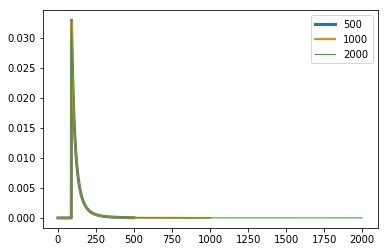

In [11]:
# further update w/ other observances
locos_pow_500.update_set(30,90)
locos_pow_1000.update_set(30,90)
locos_pow_2000.update_set(30,90)
print('locos500 pmf-mean:',locos_pow_500.pmf_mean())
print('locos2000 pmf-mean:',locos_pow_1000.pmf_mean())
print('locos2000 pmf-mean:',locos_pow_2000.pmf_mean())
locos_pow_500.plot(legend=True,label='500', linewidth=3.0)
locos_pow_1000.plot(legend=True,label='1000', linewidth=2.0)
locos_pow_2000.plot(legend=True,label='2000', linewidth=1.0)

In [12]:
# credible intervals from pmf and cdf are the same
print('(pmf)90% certainty interval:',locos_pow_1000.pmf_credible_interval())
print('(cdf) 90% certainty interval:',locos_pow_1000.credible_interval())

(pmf)90% certainty interval: (91, 242)
(cdf) 90% certainty interval: (91, 242)


In [13]:
tot_time = 0
for _ in range(1000):
    start = timer()
    locos_pow_1000.pmf_credible_interval()
    end = timer()
    tot_time += (end - start)
print('pmf avg time:',tot_time/10)

pmf avg time: 0.026964480000000023


In [14]:
tot_time = 0
for _ in range(1000):
    start = timer()
    locos_pow_1000.credible_interval()
    end = timer()
    tot_time += (end - start)
print('convert to cdf avg time:',tot_time/10)

convert to cdf avg time: 0.07409169066666674


In [15]:
cdf = locos_pow_1000.to_cdf()
tot_time = 0
for _ in range(1000):
    start = timer()
    cdf.credible_interval()
    end = timer()
    tot_time += (end - start)
print('cdf avg time:',tot_time/10)

cdf avg time: 0.03937096533333358
